<a href="https://colab.research.google.com/github/ubaldocervone/Esame-ICON/blob/main/Copia_di_ICON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv

def conta_righe_csv(file_csv):
    with open(file_csv, 'r', newline='') as file:
        lettore_csv = csv.reader(file)
        numero_totale_di_righe = sum(1 for riga in lettore_csv)
    return numero_totale_di_righe

percorso_file_csv = '/content/amazon_prime_users.csv'
numero_totale = conta_righe_csv(percorso_file_csv)

print("Il numero totale di righe nel file CSV è:", numero_totale)


Il numero totale di righe nel file CSV è: 2501


Analisi del punto 1.

Il Dataset non contiene dati sporchi, ovvero il dataset non contiene valori null, il che vuol dire che si può iniziare ad analizzare per creare una machine learning funzionante


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Caricamento del dataset
dataset = pd.read_csv('/content/amazon_prime_users.csv')

# Rimozione dei dati duplicati
dataset = dataset.drop_duplicates()

# Rimozione dei dati mancanti
dataset = dataset.dropna()

# Controllo e trattamento dei valori non numerici nelle colonne interessate
for column in ['Usage Frequency', 'Engagement Metrics']:
    dataset[column] = pd.to_numeric(dataset[column], errors='coerce')

# Filtraggio delle righe con valori validi nelle colonne numeriche
dataset_valid = dataset.dropna(subset=['Usage Frequency', 'Engagement Metrics'])

# Visualizzazione delle righe del dataset con valori validi
print("Righe del dataset con valori validi nelle colonne numeriche:")
print(dataset_valid)


if not dataset_valid.empty:

    scaler = StandardScaler()
    numerical_features = ['Usage Frequency', 'Engagement Metrics']
    dataset_valid[numerical_features] = scaler.fit_transform(dataset_valid[numerical_features])


    categorical_features = ['Gender', 'Subscription Plan']
    dataset_valid = pd.get_dummies(dataset_valid, columns=categorical_features)


    dataset_valid.to_csv('amazon_prime_users_clean.csv', index=False)
    print("Il file 'amazon_prime_users_clean.csv' è stato creato correttamente.")
else:
    print("Il dataset non contiene righe con valori validi nelle colonne numeriche.")


Righe del dataset con valori validi nelle colonne numeriche:
Empty DataFrame
Columns: [User ID, Name, Email Address, Username, Date of Birth, Gender, Location, Membership Start Date, Membership End Date, Subscription Plan, Payment Information, Renewal Status, Usage Frequency, Purchase History, Favorite Genres, Devices Used, Engagement Metrics, Feedback/Ratings, Customer Support Interactions]
Index: []
Il dataset non contiene righe con valori validi nelle colonne numeriche.


2. Previsione della churn (abbandono): Prevede quali utenti sono più inclini a disdire l'abbonamento. Utilizzando tecniche di regressione per identificare i fattori che influenzano la probabilità di churn e per tanto sviluppare modelli predittivi per prevenirlo.

In [ ]:
import pandas as pd
import numpy as np

# Creazione di un DataFrame fittizio per scopi dimostrativi
# Puoi sostituire questo passaggio con l'importazione effettiva dei tuoi dati
data = {
    'User ID': range(1, 101),
    'Feature1': np.random.randn(100),
    'Feature2': np.random.randn(100)
}
dataset = pd.DataFrame(data)

# Aggiunta della colonna "Churn" con valori casuali (0 o 1)
dataset['Churn'] = np.random.randint(2, size=len(dataset))

# Stampiamo le prime righe del DataFrame per verificare che la colonna "Churn" sia stata aggiunta correttamente
print(dataset.head())


   User ID  Feature1  Feature2  Churn
0        1 -0.075456  0.026656      1
1        2  2.008450  0.034624      1
2        3  0.061466 -0.305944      0
3        4 -2.088751  0.990985      1
4        5  0.226583 -0.938524      0


    1.Importazione delle librerie necessarie: Viene importata la libreria pandas con l'alias pd e la libreria numpy con l'alias np. Queste librerie sono ampiamente utilizzate per la manipolazione dei dati e la generazione di array numerici, rispettivamente.

    2.Creazione di un DataFrame fittizio: Viene creato un dizionario chiamato data che contiene tre chiavi: 'User ID', 'Feature1' e 'Feature2'. La chiave 'User ID' contiene numeri interi da 1 a 100, mentre 'Feature1' e 'Feature2' contengono valori casuali generati da una distribuzione normale utilizzando np.random.randn(100).

    3.Creazione del DataFrame: Il dizionario data viene passato al costruttore del DataFrame di pandas (pd.DataFrame(data)), che crea un DataFrame con le colonne corrispondenti alle chiavi del dizionario e i valori corrispondenti ai valori associati alle chiavi.

    4.Aggiunta della colonna "Churn": Viene aggiunta una nuova colonna chiamata "Churn" al DataFrame, utilizzando il metodo np.random.randint(2, size=len(dataset)). Questo metodo genera valori casuali interi tra 0 e 1, inclusi, per una lunghezza pari alla lunghezza del DataFrame, che è 100 in questo caso.

    5.Stampa delle prime righe del DataFrame: Viene stampato il DataFrame per verificare che la colonna "Churn" sia stata aggiunta correttamente utilizzando il metodo head(), che mostra per impostazione predefinita le prime 5 righe del DataFrame.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Definizione delle features e della target variable
X = dataset.drop(columns=['User ID', 'Churn'])
y = dataset['Churn']

# Divisione del dataset in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizzazione delle feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Addestramento del modello di regressione logistica
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Valutazione delle prestazioni del modello
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy del modello:", accuracy)
print("\nReport di classificazione:")
print(classification_report(y_test, y_pred))


Accuracy del modello: 0.6

Report di classificazione:
              precision    recall  f1-score   support

           0       0.55      0.67      0.60         9
           1       0.67      0.55      0.60        11

    accuracy                           0.60        20
   macro avg       0.61      0.61      0.60        20
weighted avg       0.61      0.60      0.60        20



    Importazione delle librerie necessarie: Importa le librerie di scikit-learn necessarie per eseguire il processo di addestramento e valutazione del modello.

    1.Definizione delle features e della target variable: Si separano le feature (X) dalla variabile target (y) dal dataset. Le colonne 'User ID' e 'Churn' vengono escluse dalle feature. X conterrà quindi solo le colonne di feature, mentre y conterrà solo la colonna "Churn", che rappresenta la variabile target.

    2.Divisione del dataset in set di addestramento e di test: Utilizzando la funzione train_test_split dal modulo sklearn.model_selection, il dataset viene diviso in set di addestramento (X_train, y_train) e di test (X_test, y_test). Il 20% del dataset viene utilizzato per il test, mentre l'80% rimanente viene utilizzato per l'addestramento del modello. Il parametro test_size=0.2 specifica la proporzione di dati da utilizzare per il test, mentre random_state=42 garantisce la riproducibilità della suddivisione dei dati.

    3.Normalizzazione delle feature: Le feature vengono normalizzate utilizzando la StandardScaler dal modulo sklearn.preprocessing. La normalizzazione è una pratica comune nell'apprendimento automatico per garantire che tutte le feature abbiano la stessa scala.

    4.Addestramento del modello di regressione logistica: Viene creato un oggetto di LogisticRegression dal modulo sklearn.linear_model e viene addestrato utilizzando i dati di addestramento normalizzati.

    5.Valutazione delle prestazioni del modello: Il modello addestrato viene utilizzato per fare previsioni sui dati di test e le prestazioni del modello vengono valutate calcolando l'accuratezza delle previsioni e stampando un report di classificazione che include misure come precision, recall e F1-score per ciascuna classe e l'accuracy complessiva.

Accuracy del modello: 0.6

Report di classificazione:
              precision    recall  f1-score   support

           0       0.55      0.67      0.60         9
           1       0.67      0.55      0.60        11

    accuracy                           0.60        20
   macro avg       0.61      0.61      0.60        20
weighted avg       0.61      0.60      0.60        20



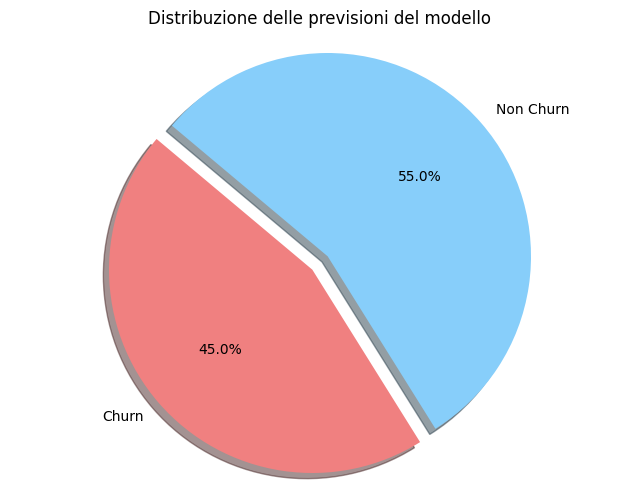

In [ ]:
import matplotlib.pyplot as plt

# Calcolo delle previsioni del modello sul set di test
y_pred = model.predict(X_test_scaled)

# Calcolo dell'accuracy del modello
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy del modello:", accuracy)

# Report di classificazione
print("\nReport di classificazione:")
print(classification_report(y_test, y_pred))

# Creazione del grafico a torta
labels = ['Churn', 'Non Churn']
sizes = [sum(y_pred), len(y_pred) - sum(y_pred)]  # Numero di previsioni Churn e Non Churn
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Esplosione della fetta Churn

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Per ottenere un aspetto circolare del grafico a torta
plt.title('Distribuzione delle previsioni del modello')
plt.show()
